In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [3]:
ETOPO2_Arctic=scipy.io.loadmat('_libs/ETOPO2_Arctic.mat')
lon_arctic=ETOPO2_Arctic['lon_arctic']
lat_arctic=ETOPO2_Arctic['lat_arctic']
topo_arctic=ETOPO2_Arctic['topo_arctic']
#
res_unit=5
lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]*-1

In [4]:
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/Simulations/NSP03_1m_20020101_20041231_ptrc_T.nc')
nav_lon = ptrc_obj['nav_lon'][:]
nav_lat = ptrc_obj['nav_lat'][:]
Ba = ptrc_obj.variables['Ba'][9, :, :, :]
d18O = ptrc_obj.variables['d18O'][9, :, :, :]

In [5]:
names = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/fday/*2002*')
names

['/ocean/yingkai/GEOTRACES/FORCING/ANHA4/fday/ANHA4-EXH001_gridT_y2002m07d04.nc',
 '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/fday/ANHA4-EXH001_gridU_y2002m07d04.nc',
 '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/fday/ANHA4-EXH001_gridW_y2002m07d04.nc',
 '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/fday/ANHA4-EXH001_gridV_y2002m07d04.nc',
 '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/fday/ANHA4-EXH001_icemod_y2002m07d04.nc']

In [6]:
objI = nc.Dataset(names[-1])
SSS = objI.variables['isssalin'][:]
IC = objI.variables['ileadfra'][:]

In [7]:
d18O[Ba==0]=np.nan

In [8]:
L=0; lev1 = np.arange(30, 85, 5)
lev2 = np.array([-3.25, -2.25, -1.25, -0.25, 0.25, 1.25, 2.25, 3.25])

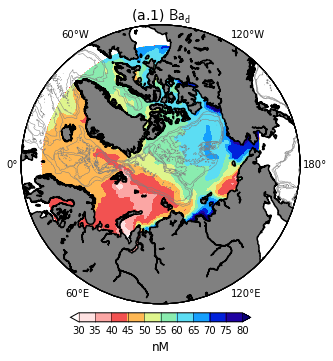

In [22]:
fig=plt.figure(figsize=(5, 5));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color='gray', lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')

x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, Ba[L, :, :], lev1, cmap=cm.GMT_haxby_r, extend='both')
#proj.contour(x, y, Ba[L, :, :], lev1, linewidths=0.5, colors=('gray',))

topox, topoy = proj(lon_arctic, lat_arctic)
CS2 = proj.contour(topox, topoy, topo_arctic, [1000, 2000, 3000], linewidths=0.5, linestyles='-', colors='gray')
#legend1 = plt.legend([CS2.collections[0]], ['1, 2, 3 km bathymetry'], bbox_to_anchor=(1.35, 0.95), frameon=False)

cax = fig.add_axes([0.2625, 0.075, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=10)
CBar.set_ticks(lev1)
ax.set_title('(a.1) $\mathsf{Ba_d}$', fontsize=14)

fig.savefig('result_1.pdf', dpi=600, orientation='portrait', papertype='a4', format='pdf',
            transparent=True, bbox_inches='tight', pad_inches=0.01)

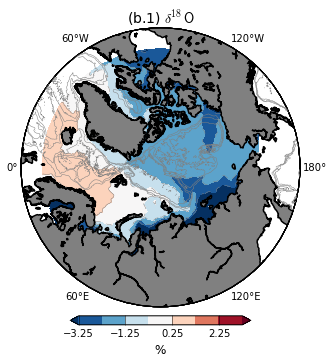

In [25]:
fig=plt.figure(figsize=(5, 5));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color='gray', lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, d18O[0, :, :], lev2, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x, y, d18O[0, :, :], lev2, linewidths=0.5, colors=('gray',))
topox, topoy = proj(lon_arctic, lat_arctic)
CS2 = proj.contour(topox, topoy, topo_arctic, [1000, 2000, 3000], linewidths=0.5, linestyles='-', colors='gray')
#legend1 = plt.legend([CS2.collections[0]], ['1, 2, 3 km bathymetry'], bbox_to_anchor=(1.35, 0.95), frameon=False)
cax = fig.add_axes([0.2625, 0.075, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('%', fontsize=12)
CBar.ax.tick_params(axis='x', length=10)
CBar.set_ticks(lev2[::2])
ax.set_title('(b.1) $\mathsf{\delta^{18}O}$', fontsize=14)

fig.savefig('result_2.pdf', dpi=600, orientation='portrait', papertype='a4', format='pdf',
            transparent=True, bbox_inches='tight', pad_inches=0.01)

In [26]:
lev3 = np.arange(20, 40, 2)

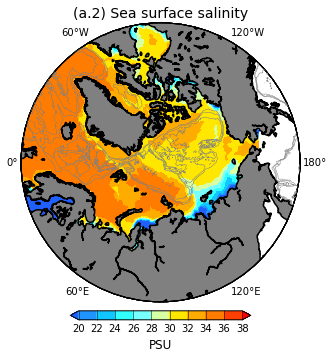

In [27]:
fig=plt.figure(figsize=(5, 5));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color='gray', lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, SSS[0, :, :], lev3, cmap=cm.GMT_no_green, extend='both')
#proj.contour(x, y, Ba[L, :, :], lev1, linewidths=0.5, colors=('gray',))
topox, topoy = proj(lon_arctic, lat_arctic)
CS2 = proj.contour(topox, topoy, topo_arctic, [1000, 2000, 3000], linewidths=0.5, linestyles='-', colors='gray')
#legend1 = plt.legend([CS2.collections[0]], ['1, 2, 3 km bathymetry'], bbox_to_anchor=(1.35, 0.95), frameon=False)
cax = fig.add_axes([0.2625, 0.075, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('PSU', fontsize=12)
CBar.ax.tick_params(axis='x', length=10)
CBar.set_ticks(lev3)
ax.set_title('(a.2) Sea surface salinity', fontsize=14)

fig.savefig('result_3.pdf', dpi=600, orientation='portrait', papertype='a4', format='pdf',
            transparent=True, bbox_inches='tight', pad_inches=0.01)

In [28]:
lev4 = np.arange(50, 105, 5)

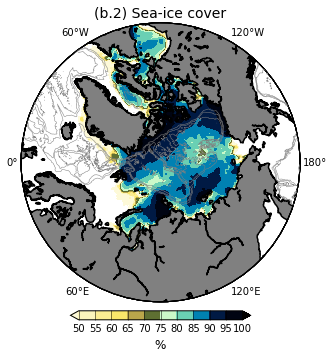

In [29]:
fig=plt.figure(figsize=(5, 5));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color='gray', lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, IC[0, :, :]*100, lev4, cmap=cm.GMT_relief_r, extend='both')
#proj.contour(x, y, Ba[L, :, :], lev1, linewidths=0.5, colors=('gray',))
topox, topoy = proj(lon_arctic, lat_arctic)
CS2 = proj.contour(topox, topoy, topo_arctic, [1000, 2000, 3000], linewidths=0.5, linestyles='-', colors='gray')
#legend1 = plt.legend([CS2.collections[0]], ['1, 2, 3 km bathymetry'], bbox_to_anchor=(1.35, 0.95), frameon=False)
cax = fig.add_axes([0.2625, 0.075, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('%', fontsize=12)
CBar.ax.tick_params(axis='x', length=10)
CBar.set_ticks(lev4)
ax.set_title('(b.2) Sea-ice cover', fontsize=14)

fig.savefig('result_4.pdf', dpi=600, orientation='portrait', papertype='a4', format='pdf',
            transparent=True, bbox_inches='tight', pad_inches=0.01)